In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("IMDB Dataset.csv", encoding='latin1')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Dropout,GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [17]:
texts = df["review"].values
labels = LabelEncoder().fit_transform(df["sentiment"].values)

In [18]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences,maxlen=200)

In [19]:
x_train,x_test,y_train,y_test = train_test_split(padded,labels,test_size=0.2,random_state=42)

In [20]:
model = Sequential([
    Embedding(input_dim=10000,output_dim=16,input_length=200),
    GlobalAveragePooling1D(),
    Dense(16,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['Accuracy'])
model.summary()

C:\Users\vaish\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
early_stop = EarlyStopping(monitor='val_loss',patience = 2,restore_best_weights= True)
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[early_stop],epochs=20,batch_size=32)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - Accuracy: 0.6248 - loss: 0.6375 - val_Accuracy: 0.8630 - val_loss: 0.3585
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - Accuracy: 0.8424 - loss: 0.3894 - val_Accuracy: 0.8848 - val_loss: 0.2916
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - Accuracy: 0.8729 - loss: 0.3323 - val_Accuracy: 0.8892 - val_loss: 0.2696
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - Accuracy: 0.8873 - loss: 0.2983 - val_Accuracy: 0.8912 - val_loss: 0.2642
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - Accuracy: 0.8937 - loss: 0.2886 - val_Accuracy: 0.8927 - val_loss: 0.2638
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - Accuracy: 0.8989 - loss: 0.2776 - val_Accuracy: 0.8847 - val_loss: 0.2793
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - Accuracy: 0.9035 - loss: 0.2672 - val_Accuracy: 0.8853 - val_loss: 0.2805


In [22]:
loss,accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.8924 - loss: 0.2664 


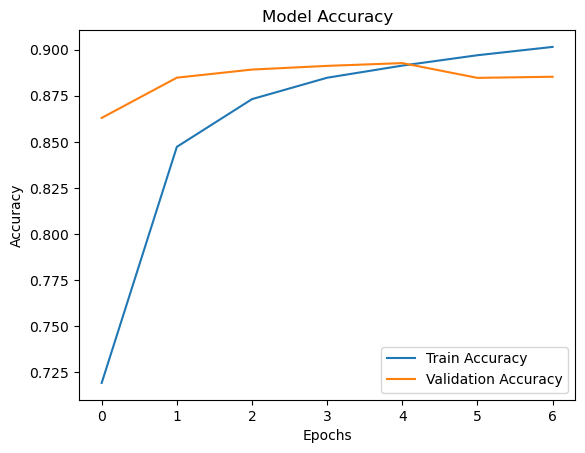

In [23]:
plt.plot(history.history['Accuracy'],label = 'Train Accuracy')
plt.plot(history.history['val_Accuracy'],label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

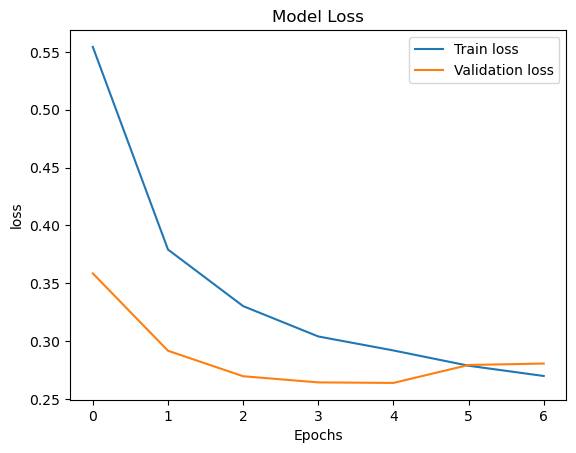

In [24]:
plt.plot(history.history['loss'],label = 'Train loss')
plt.plot(history.history['val_loss'],label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.title("Model Loss")
plt.show()